# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `Questions`

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

> Let's set some print option.

In [2]:
pd.set_option("display.min_rows", 25)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 15)
pd.set_option("precision", 3)

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You need to have `pandas_datareader` module.

In [3]:
import pandas_datareader.data as web

> Let's start & end dates--we are interested in year 2021 until August.

In [4]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [5]:
apple = web.DataReader("AAPL", "yahoo", start, end)
google = web.DataReader("GOOGL", "yahoo", start, end)

> You may save the data to csv files.

In [6]:
apple.to_csv("apple_2021_stock.csv")
google.to_csv("google_2021_stock.csv")

> Let's read the stored files.

In [7]:
apple_2021 = pd.read_csv("apple_2021_stock.csv", index_col=0, parse_dates=True)
google_2021 = pd.read_csv("google_2021_stock.csv", index_col=0, parse_dates=True)

#### Have a quick look at your data.

In [8]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.74,131.72,134.08,132.69,9.912e+07,132.069
2021-01-04,133.61,126.76,133.52,129.41,1.433e+08,128.805
2021-01-05,131.74,128.43,128.89,131.01,9.766e+07,130.397
2021-01-06,131.05,126.38,127.72,126.60,1.551e+08,126.008
2021-01-07,131.63,127.86,128.36,130.92,1.096e+08,130.308


In [9]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,1757.50,1736.09,1737.27,1752.64,1053500,1752.64
2021-01-04,1762.49,1707.14,1760.00,1726.13,1866200,1726.13
2021-01-05,1746.83,1716.90,1725.09,1740.05,1018000,1740.05
2021-01-06,1743.97,1696.10,1700.26,1722.88,2329400,1722.88
2021-01-07,1777.82,1726.76,1726.76,1774.34,2096800,1774.34


In [10]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,168.000,168.000,168.000,168.000,1.680e+02,168.000
mean,134.834,132.099,133.469,133.531,9.174e+07,133.213
std,9.059,9.125,9.012,9.191,2.796e+07,9.267
min,120.400,116.210,119.030,116.360,4.640e+07,115.989
25%,127.590,125.130,126.393,126.083,7.187e+07,125.786
50%,133.585,130.435,132.145,132.030,8.858e+07,131.556
75%,144.062,140.155,141.873,142.157,1.056e+08,141.915
max,153.490,151.290,152.660,153.120,1.855e+08,153.120


In [11]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,168.000,168.000,168.000,168.000,1.680e+02,168.000
mean,2305.031,2264.523,2283.471,2286.901,1.539e+06,2286.901
std,293.871,298.824,297.770,297.533,6.738e+05,297.533
min,1743.970,1696.100,1700.260,1722.880,7.151e+05,1722.880
25%,2082.333,2033.920,2057.647,2057.770,1.113e+06,2057.770
50%,2306.900,2266.185,2294.245,2290.370,1.328e+06,2290.370
75%,2473.452,2449.797,2456.250,2460.930,1.714e+06,2460.930
max,2919.410,2885.620,2902.940,2893.950,4.894e+06,2893.950


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August 2021

In [12]:
apple_07 = apple.loc["2021-07"][["Adj Close"]]
apple_08 = apple.loc["2021-08"][["Adj Close"]]

In [13]:
apple_07.head()

,Adj Close
Date,
2021-07-01,137.065
2021-07-02,139.751
2021-07-06,141.808
2021-07-07,144.354
2021-07-08,143.026


In [14]:
apple_08.head()

,Adj Close
Date,
2021-08-02,145.302
2021-08-03,147.140
2021-08-04,146.730
2021-08-05,146.840
2021-08-06,146.140


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [15]:
apple_07.iloc[:3].append(apple_08.iloc[:3])

,Adj Close
Date,
2021-07-01,137.065
2021-07-02,139.751
2021-07-06,141.808
2021-08-02,145.302
2021-08-03,147.140
2021-08-04,146.730


In [20]:
pd.concat([apple_07.head(3), apple_08.head(3)])

,Adj Close
Date,
2021-07-01,137.065
2021-07-02,139.751
2021-07-06,141.808
2021-08-02,145.302
2021-08-03,147.140
2021-08-04,146.730


#### Question 1-2. How would you extract only the 2021 August GOOGL values?

In [16]:
google_08 = google.loc["2021-08"][["Adj Close"]]
google_08

,Adj Close
Date,
2021-08-02,2697.09
2021-08-03,2712.60
2021-08-04,2702.51
2021-08-05,2725.03
2021-08-06,2714.77
2021-08-09,2738.26
2021-08-10,2736.14
2021-08-11,2725.58
2021-08-12,2743.88


#### Question 1-3. Please concatenate the AAPL and GOOGL 2021 August stock data--there will be duplicate index labels

In [23]:
DUP = pd.concat([apple_08[:3],google_08[:3]])
DUP

,Adj Close
Date,
2021-08-02,145.302
2021-08-03,147.140
2021-08-04,146.730
2021-08-02,2697.090
2021-08-03,2712.600
2021-08-04,2702.510


> Let's see the `two records for data of 2021-08-03`

In [24]:
DUP.loc["2021-08-03"]

,Adj Close
Date,
2021-08-03,147.14
2021-08-03,2712.60


#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [26]:
AC = pd.concat([apple_08[:3],google_08[:3]],
               keys = ["AAPL", "GOOGL"])
AC

Adj Close
      Date                 
AAPL  2021-08-02    145.302
      2021-08-03    147.140
      2021-08-04    146.730
GOOGL 2021-08-02   2697.090
      2021-08-03   2712.600
      2021-08-04   2702.510

> Let's extract just GOOGL values using `.loc`

In [27]:
AC.loc["GOOGL"]

,Adj Close
Date,
2021-08-02,2697.09
2021-08-03,2712.60
2021-08-04,2702.51


#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [30]:
APPLE_CV = apple[["Adj Close", "Volume"]]
GOOGLE_CV = google[["Adj Close", "Volume"]]
pd.concat([APPLE_CV, GOOGLE_CV])

,Adj Close,Volume
Date,,
2020-12-31,132.069,9.912e+07
2021-01-04,128.805,1.433e+08
2021-01-05,130.397,9.766e+07
2021-01-06,126.008,1.551e+08
2021-01-07,130.308,1.096e+08
2021-01-08,131.432,1.052e+08
2021-01-11,128.377,1.004e+08
2021-01-12,128.198,9.195e+07
2021-01-13,130.278,8.864e+07


> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [31]:
GOOGLE_C = google[["Adj Close"]]
pd.concat([APPLE_CV, GOOGLE_C])

,Adj Close,Volume
Date,,
2020-12-31,132.069,9.912e+07
2021-01-04,128.805,1.433e+08
2021-01-05,130.397,9.766e+07
2021-01-06,126.008,1.551e+08
2021-01-07,130.308,1.096e+08
2021-01-08,131.432,1.052e+08
2021-01-11,128.377,1.004e+08
2021-01-12,128.198,9.195e+07
2021-01-13,130.278,8.864e+07


### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [32]:
pd.concat([APPLE_CV, GOOGLE_C], join = "inner")

,Adj Close
Date,
2020-12-31,132.069
2021-01-04,128.805
2021-01-05,130.397
2021-01-06,126.008
2021-01-07,130.308
2021-01-08,131.432
2021-01-11,128.377
2021-01-12,128.198
2021-01-13,130.278


#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [33]:
APPLE_C = apple[["Adj Close"]]

In [34]:
AC = pd.concat([APPLE_C, GOOGLE_C],
                axis = 1)
AC

,Adj Close,Adj Close
Date,,
2020-12-31,132.069,1752.64
2021-01-04,128.805,1726.13
2021-01-05,130.397,1740.05
2021-01-06,126.008,1722.88
2021-01-07,130.308,1774.34
2021-01-08,131.432,1797.83
2021-01-11,128.377,1756.29
2021-01-12,128.198,1737.43
2021-01-13,130.278,1747.25


#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

In [37]:
pd.concat([APPLE_CV[:5], GOOGLE_CV[:3]],
          axis = 1,
          keys = ["APPLE", "GOOGL"])

APPLE                GOOGL           
           Adj Close     Volume Adj Close     Volume
Date                                                
2020-12-31   132.069  9.912e+07   1752.64  1.054e+06
2021-01-04   128.805  1.433e+08   1726.13  1.866e+06
2021-01-05   130.397  9.766e+07   1740.05  1.018e+06
2021-01-06   126.008  1.551e+08       NaN        NaN
2021-01-07   130.308  1.096e+08       NaN        NaN

#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

In [38]:
pd.concat([APPLE_CV[:5], GOOGLE_CV[:3]],
          axis = 1,
          keys = ["APPLE", "GOOGL"],
          join = "inner")

APPLE                GOOGL         
           Adj Close     Volume Adj Close   Volume
Date                                              
2020-12-31   132.069  9.912e+07   1752.64  1053500
2021-01-04   128.805  1.433e+08   1726.13  1866200
2021-01-05   130.397  9.766e+07   1740.05  1018000

#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [41]:
pd.concat([APPLE_C[:3], GOOGLE_C[:3]],
          ignore_index = True)

,Adj Close
0,132.069
1,128.805
2,130.397
3,1752.640
4,1726.130
5,1740.050


### `Now let's merging DataFrame objects`

In [42]:
APPLE_CR = APPLE_C.reset_index()
APPLE_CR

,Date,Adj Close
0,2020-12-31,132.069
1,2021-01-04,128.805
2,2021-01-05,130.397
3,2021-01-06,126.008
4,2021-01-07,130.308
5,2021-01-08,131.432
6,2021-01-11,128.377
7,2021-01-12,128.198
8,2021-01-13,130.278
9,2021-01-14,128.307


### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

In [44]:
APPLE_VR = apple[["Volume"]].reset_index()

In [45]:
APPLE_CV_merged = pd.merge(APPLE_CR, APPLE_VR)
APPLE_CV_merged.head()

,Date,Adj Close,Volume
0,2020-12-31,132.069,9.912e+07
1,2021-01-04,128.805,1.433e+08
2,2021-01-05,130.397,9.766e+07
3,2021-01-06,126.008,1.551e+08
4,2021-01-07,130.308,1.096e+08


> We will see join using the DataFrame.

In [46]:
APPLE_CR05 = APPLE_CR[:5]
APPLE_CR05

,Date,Adj Close
0,2020-12-31,132.069
1,2021-01-04,128.805
2,2021-01-05,130.397
3,2021-01-06,126.008
4,2021-01-07,130.308


> and also this one

In [48]:
APPLE_VR24 = APPLE_VR[2:4]
APPLE_VR24

,Date,Volume
2,2021-01-05,9.766e+07
3,2021-01-06,1.551e+08


#### Question 3-2. Please use the merge function to create the below.

In [49]:
pd.merge(APPLE_CR05, APPLE_VR24)

,Date,Adj Close,Volume
0,2021-01-05,130.397,9.766e+07
1,2021-01-06,126.008,1.551e+08


#### Question 3-3. How would you create the below then?

In [50]:
pd.merge(APPLE_CR05, APPLE_VR24,
        how = "outer")

,Date,Adj Close,Volume
0,2020-12-31,132.069,NaN
1,2021-01-04,128.805,NaN
2,2021-01-05,130.397,9.766e+07
3,2021-01-06,126.008,1.551e+08
4,2021-01-07,130.308,NaN


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [51]:
apple.insert(0, "Symbol", "AAPL")
google.insert(0, "Symbol", "GOOGL")

#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [52]:
APPLE_GOOGLE = pd.concat([apple, google]).sort_index()
APPLE_GOOGLE

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-12-31,AAPL,134.74,131.72,134.08,132.69,9.912e+07,132.069
2020-12-31,GOOGL,1757.50,1736.09,1737.27,1752.64,1.054e+06,1752.640
2021-01-04,GOOGL,1762.49,1707.14,1760.00,1726.13,1.866e+06,1726.130
2021-01-04,AAPL,133.61,126.76,133.52,129.41,1.433e+08,128.805
2021-01-05,AAPL,131.74,128.43,128.89,131.01,9.766e+07,130.397
2021-01-05,GOOGL,1746.83,1716.90,1725.09,1740.05,1.018e+06,1740.050
2021-01-06,AAPL,131.05,126.38,127.72,126.60,1.551e+08,126.008
2021-01-06,GOOGL,1743.97,1696.10,1700.26,1722.88,2.329e+06,1722.880
2021-01-07,AAPL,131.63,127.86,128.36,130.92,1.096e+08,130.308


#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [53]:
APPLE_GOOGLE_RI = APPLE_GOOGLE.reset_index()
APPLE_GOOGLE_RI.head()

,Date,Symbol,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,AAPL,134.74,131.72,134.08,132.69,9.912e+07,132.069
1,2020-12-31,GOOGL,1757.50,1736.09,1737.27,1752.64,1.054e+06,1752.640
2,2021-01-04,GOOGL,1762.49,1707.14,1760.00,1726.13,1.866e+06,1726.130
3,2021-01-04,AAPL,133.61,126.76,133.52,129.41,1.433e+08,128.805
4,2021-01-05,AAPL,131.74,128.43,128.89,131.01,9.766e+07,130.397


#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [54]:
# 分类变量可转置
A4_4 = APPLE_GOOGLE_RI.pivot(index = "Date",
                      columns = "Symbol",
                      values = "Adj Close")
A4_4.head()

Symbol,AAPL,GOOGL
Date,,
2020-12-31,132.069,1752.64
2021-01-04,128.805,1726.13
2021-01-05,130.397,1740.05
2021-01-06,126.008,1722.88
2021-01-07,130.308,1774.34


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [55]:
A5_1 = A4_4.stack()
A5_1

Date        Symbol
2020-12-31  AAPL       132.069
            GOOGL     1752.640
2021-01-04  AAPL       128.805
            GOOGL     1726.130
2021-01-05  AAPL       130.397
            GOOGL     1740.050
2021-01-06  AAPL       126.008
            GOOGL     1722.880
2021-01-07  AAPL       130.308
            GOOGL     1774.340
2021-01-08  AAPL       131.432
            GOOGL     1797.830
                        ...   
2021-08-24  AAPL       149.620
            GOOGL     2825.230
2021-08-25  AAPL       148.360
            GOOGL     2841.580
2021-08-26  AAPL       147.540
            GOOGL     2828.810
2021-08-27  AAPL       148.600
            GOOGL     2880.080
2021-08-30  AAPL       153.120
            GOOGL     2891.810
2021-08-31  AAPL       151.830
            GOOGL     2893.950
Length: 336, dtype: float64

> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [58]:
A5_1_2 = A5_1.loc["2021-01-04", "AAPL"]
A5_1_2

128.80482482910156

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [61]:
A5_1.at["2021-01-04"]

Symbol
AAPL      128.805
GOOGL    1726.130
dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [62]:
A5_1.loc[:,"GOOGL"]

Date
2020-12-31    1752.64
2021-01-04    1726.13
2021-01-05    1740.05
2021-01-06    1722.88
2021-01-07    1774.34
2021-01-08    1797.83
2021-01-11    1756.29
2021-01-12    1737.43
2021-01-13    1747.25
2021-01-14    1730.92
2021-01-15    1727.62
2021-01-19    1784.47
               ...   
2021-08-16    2766.19
2021-08-17    2733.23
2021-08-18    2708.98
2021-08-19    2713.60
2021-08-20    2748.59
2021-08-23    2800.83
2021-08-24    2825.23
2021-08-25    2841.58
2021-08-26    2828.81
2021-08-27    2880.08
2021-08-30    2891.81
2021-08-31    2893.95
Length: 168, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

In [63]:
A5_3 = A5_1.unstack()
A5_3[:3]

Symbol,AAPL,GOOGL
Date,,
2020-12-31,132.069,1752.64
2021-01-04,128.805,1726.13
2021-01-05,130.397,1740.05


In [65]:
A4_4 == A5_3

Symbol,AAPL,GOOGL
Date,,
2020-12-31,True,True
2021-01-04,True,True
2021-01-05,True,True
2021-01-06,True,True
2021-01-07,True,True
2021-01-08,True,True
2021-01-11,True,True
2021-01-12,True,True
2021-01-13,True,True


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [67]:
APPLE_GOOGLE_MELTED = pd.melt(APPLE_GOOGLE_RI,
                              id_vars = ["Date", "Symbol"])
APPLE_GOOGLE_MELTED.sample(20)

,Date,Symbol,variable,value
1139,2021-04-07,GOOGL,Close,2.239e+03
764,2021-03-10,AAPL,Open,1.217e+02
1088,2021-03-02,AAPL,Close,1.251e+02
934,2021-07-12,AAPL,Open,1.462e+02
1068,2021-02-16,GOOGL,Close,2.111e+03
1446,2021-03-17,AAPL,Volume,1.119e+08
1482,2021-04-13,AAPL,Volume,9.127e+07
907,2021-06-21,AAPL,Open,1.303e+02
1454,2021-03-23,GOOGL,Volume,1.426e+06
1810,2021-04-07,AAPL,Adj Close,1.275e+02


#### Question 6-2. Please extract the values for the data for Google on 2021-08-24

In [69]:
APPLE_GOOGLE_MELTED[(APPLE_GOOGLE_MELTED.Date == "2021-08-31") & (APPLE_GOOGLE_MELTED.Symbol == "GOOGL")]

,Date,Symbol,variable,value
335,2021-08-31,GOOGL,High,2.903e+03
671,2021-08-31,GOOGL,Low,2.886e+03
1007,2021-08-31,GOOGL,Open,2.903e+03
1343,2021-08-31,GOOGL,Close,2.894e+03
1679,2021-08-31,GOOGL,Volume,1.122e+06
2015,2021-08-31,GOOGL,Adj Close,2.894e+03


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [70]:
A7_1 = APPLE_GOOGLE[["Symbol", "Adj Close"]].reset_index()
A7_1

,Date,Symbol,Adj Close
0,2020-12-31,AAPL,132.069
1,2020-12-31,GOOGL,1752.640
2,2021-01-04,GOOGL,1726.130
3,2021-01-04,AAPL,128.805
4,2021-01-05,AAPL,130.397
5,2021-01-05,GOOGL,1740.050
6,2021-01-06,AAPL,126.008
7,2021-01-06,GOOGL,1722.880
8,2021-01-07,AAPL,130.308
9,2021-01-07,GOOGL,1774.340


#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [71]:
A7_1.insert(1, "Year", pd.DatetimeIndex(A7_1["Date"]).year)

In [72]:
A7_1.insert(2, "Month", pd.DatetimeIndex(A7_1["Date"]).month)
A7_1.head()

,Date,Year,Month,Symbol,Adj Close
0,2020-12-31,2020,12,AAPL,132.069
1,2020-12-31,2020,12,GOOGL,1752.640
2,2021-01-04,2021,1,GOOGL,1726.130
3,2021-01-04,2021,1,AAPL,128.805
4,2021-01-05,2021,1,AAPL,130.397


> Let's group by the Symbol column

In [73]:
A7_1.groupby("Symbol")

> Here, please save the result!

In [87]:
A7_2 = A7_1.groupby("Symbol")

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [75]:
type(A7_2.groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [88]:
A7_2.groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 29, 31, 32, 34, 36, 38, 41, 43, 44, 47, 49, 50, 52, 55, 56, 59, 61, 63, 65, 66, 69, 70, 73, 75, 76, 79, 80, 83, 85, 86, 89, 90, 92, 95, 97, 98, 101, 102, 104, 106, 108, 111, 113, 115, 117, 118, 120, 123, 125, 127, 129, 130, 133, 134, 136, 138, 140, 143, 145, 147, 149, 151, 152, 155, 156, 159, 161, 162, 165, 166, 169, 171, 172, 175, 177, 179, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 28, 30, 33, 35, 37, 39, 40, 42, 45, 46, 48, 51, 53, 54, 57, 58, 60, 62, 64, 67, 68, 71, 72, 74, 77, 78, 81, 82, 84, 87, 88, 91, 93, 94, 96, 99, 100, 103, 105, 107, 109, 110, 112, 114, 116, 119, 121, 122, 124, 126, 128, 131, 132, 135, 137, 139, 141, 142, 144, 146, 148, 150, 153, 154, 157, 158, 160, 163, 164, 167, 168, 170, 173, 174, 176, 178, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, ...]}

In [107]:
dict(A7_2.groups)

{'AAPL': Int64Index([  0,   3,   4,   6,   8,  11,  13,  15,  17,  19,
             ...
             317, 319, 321, 323, 324, 327, 329, 331, 333, 334],
            dtype='int64', length=168),
 'GOOGL': Int64Index([  1,   2,   5,   7,   9,  10,  12,  14,  16,  18,
             ...
             316, 318, 320, 322, 325, 326, 328, 330, 332, 335],
            dtype='int64', length=168)}

In [114]:
group = A7_2.groups

> Yes, this reports the number of groups that resulted from the grouping

In [89]:
len(A7_2), A7_2.ngroups

(2, 2)

In [98]:
# 一个栗子
A7_1.groupby("Symbol")["Adj Close"].mean()

Symbol
AAPL      133.213
GOOGL    2286.901
Name: Adj Close, dtype: float64

### Question 8-1. Please create a function that prints the contents of a group. You might want to look at the outputs below for hints.

In [99]:
A7_1.head()

,Date,Year,Month,Symbol,Adj Close
0,2020-12-31,2020,12,AAPL,132.069
1,2020-12-31,2020,12,GOOGL,1752.640
2,2021-01-04,2021,1,GOOGL,1726.130
3,2021-01-04,2021,1,AAPL,128.805
4,2021-01-05,2021,1,AAPL,130.397


In [100]:
A7_1.shape[0]

336

In [118]:
# METHOD 1

def show_your_contents(n):
    DF8_1 = pd.DataFrame([])
    DF8_1a = pd.DataFrame([])
    
    for i in range(A7_1.shape[0]):
        if A7_1.index[i] in group["AAPL"]:
            DF8_1 = pd.concat([DF8_1, A7_1.iloc[i]], axis = 1)
        elif A7_1.index[i] in group["GOOGL"]:
            DF8_1a = pd.concat([DF8_1a, A7_1.iloc[i]], axis = 1)
    
    DF8_1 = DF8_1.transpose()
    DF8_1a = DF8_1a.transpose()
    
    print("AAPL")
    print(DF8_1.head(n))
    
    print("GOOGL")
    print(DF8_1a.head(n))
    
    return

In [102]:
def show_your_contents2(previous_answer):
    for name, group in previous_answer:
        print(name)
        print(group.head())

###  When you execute your function you should see the following results.

In [116]:
show_your_contents2(A7_2)

AAPL
        Date  Year  Month Symbol  Adj Close
0 2020-12-31  2020     12   AAPL    132.069
3 2021-01-04  2021      1   AAPL    128.805
4 2021-01-05  2021      1   AAPL    130.397
6 2021-01-06  2021      1   AAPL    126.008
8 2021-01-07  2021      1   AAPL    130.308
GOOGL
        Date  Year  Month Symbol  Adj Close
1 2020-12-31  2020     12  GOOGL    1752.64
2 2021-01-04  2021      1  GOOGL    1726.13
5 2021-01-05  2021      1  GOOGL    1740.05
7 2021-01-06  2021      1  GOOGL    1722.88
9 2021-01-07  2021      1  GOOGL    1774.34


In [119]:
show_your_contents(5)

AAPL
        Date  Year Month Symbol Adj Close
0 2020-12-31  2020    12   AAPL   132.069
3 2021-01-04  2021     1   AAPL   128.805
4 2021-01-05  2021     1   AAPL   130.397
6 2021-01-06  2021     1   AAPL   126.008
8 2021-01-07  2021     1   AAPL   130.308
GOOGL
        Date  Year Month Symbol Adj Close
1 2020-12-31  2020    12  GOOGL   1752.64
2 2021-01-04  2021     1  GOOGL   1726.13
5 2021-01-05  2021     1  GOOGL   1740.05
7 2021-01-06  2021     1  GOOGL   1722.88
9 2021-01-07  2021     1  GOOGL   1774.34


> .size will tell us the count of items in each group

In [120]:
A7_2.size()

Symbol
AAPL     168
GOOGL    168
dtype: int64

#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [121]:
A7_2.get_group("AAPL")

,Date,Year,Month,Symbol,Adj Close
0,2020-12-31,2020,12,AAPL,132.069
3,2021-01-04,2021,1,AAPL,128.805
4,2021-01-05,2021,1,AAPL,130.397
6,2021-01-06,2021,1,AAPL,126.008
8,2021-01-07,2021,1,AAPL,130.308
11,2021-01-08,2021,1,AAPL,131.432
13,2021-01-11,2021,1,AAPL,128.377
15,2021-01-12,2021,1,AAPL,128.198
17,2021-01-13,2021,1,AAPL,130.278
19,2021-01-14,2021,1,AAPL,128.307


#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [122]:
A8_3 = A7_1.groupby(["Symbol", "Year", "Month"])
show_your_contents2(A8_3)

('AAPL', 2020, 12)
        Date  Year  Month Symbol  Adj Close
0 2020-12-31  2020     12   AAPL    132.069
('AAPL', 2021, 1)
         Date  Year  Month Symbol  Adj Close
3  2021-01-04  2021      1   AAPL    128.805
4  2021-01-05  2021      1   AAPL    130.397
6  2021-01-06  2021      1   AAPL    126.008
8  2021-01-07  2021      1   AAPL    130.308
11 2021-01-08  2021      1   AAPL    131.432
('AAPL', 2021, 2)
         Date  Year  Month Symbol  Adj Close
41 2021-02-01  2021      2   AAPL    133.513
43 2021-02-02  2021      2   AAPL    134.359
44 2021-02-03  2021      2   AAPL    133.314
47 2021-02-04  2021      2   AAPL    136.747
49 2021-02-05  2021      2   AAPL    136.324
('AAPL', 2021, 3)
         Date  Year  Month Symbol  Adj Close
79 2021-03-01  2021      3   AAPL    127.382
80 2021-03-02  2021      3   AAPL    124.721
83 2021-03-03  2021      3   AAPL    121.671
85 2021-03-04  2021      3   AAPL    119.747
86 2021-03-05  2021      3   AAPL    121.033
('AAPL', 2021, 4)
          D

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [123]:
A9_1 = A7_1.set_index(["Symbol", "Year", "Month"])
A9_1

Date  Adj Close
Symbol Year Month                      
AAPL   2020 12    2020-12-31    132.069
GOOGL  2020 12    2020-12-31   1752.640
       2021 1     2021-01-04   1726.130
AAPL   2021 1     2021-01-04    128.805
            1     2021-01-05    130.397
GOOGL  2021 1     2021-01-05   1740.050
AAPL   2021 1     2021-01-06    126.008
GOOGL  2021 1     2021-01-06   1722.880
AAPL   2021 1     2021-01-07    130.308
GOOGL  2021 1     2021-01-07   1774.340
            1     2021-01-08   1797.830
AAPL   2021 1     2021-01-08    131.432
...                      ...        ...
            8     2021-08-24    149.620
GOOGL  2021 8     2021-08-24   2825.230
            8     2021-08-25   2841.580
AAPL   2021 8     2021-08-25    148.360
GOOGL  2021 8     2021-08-26   2828.810
AAPL   2021 8     2021-08-26    147.540
GOOGL  2021 8     2021-08-27   2880.080
AAPL   2021 8     2021-08-27    148.600
GOOGL  2021 8     2021-08-30   2891.810
AAPL   2021 8     2021-08-30    153.120
            8     2021-08-31    151.830
GOOGL  2021 8     2021-08-31   2893.950

[336 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [124]:
A9_2 = A9_1.groupby(level = 0)
show_your_contents2(A9_2)

AAPL
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 12    2020-12-31    132.069
       2021 1     2021-01-04    128.805
            1     2021-01-05    130.397
            1     2021-01-06    126.008
            1     2021-01-07    130.308
GOOGL
                        Date  Adj Close
Symbol Year Month                      
GOOGL  2020 12    2020-12-31    1752.64
       2021 1     2021-01-04    1726.13
            1     2021-01-05    1740.05
            1     2021-01-06    1722.88
            1     2021-01-07    1774.34


#### Question 9-3. Please group by three levels in the index using their names

In [125]:
A9_3 = A9_1.groupby(level = ["Symbol", "Year", "Month"])
show_your_contents2(A9_3)

('AAPL', 2020, 12)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 12    2020-12-31    132.069
('AAPL', 2021, 1)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2021 1     2021-01-04    128.805
            1     2021-01-05    130.397
            1     2021-01-06    126.008
            1     2021-01-07    130.308
            1     2021-01-08    131.432
('AAPL', 2021, 2)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2021 2     2021-02-01    133.513
            2     2021-02-02    134.359
            2     2021-02-03    133.314
            2     2021-02-04    136.747
            2     2021-02-05    136.324
('AAPL', 2021, 3)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2021 3     2021-03-01    127.382
            3     2021-03-02    124.721
            3     2021-03-03    121.671
            3     2021-03-04    119.747
       

### Remember `agg`?

### Question 10-1. Use `numpy` apply the mean function to each group.

In [126]:
A9_3.agg(np.mean)

Adj Close
Symbol Year Month           
AAPL   2020 12       132.069
       2021 1        132.415
            2        131.070
            3        121.483
            4        131.392
            5        126.550
            6        129.764
            7        144.922
            8        148.138
GOOGL  2020 12      1752.640
       2021 1       1800.196
            2       2058.089
            3       2047.674
            4       2272.994
            5       2308.558
            6       2420.923
            7       2571.203
            8       2767.422

#### Question 10-2. How would you obtain the below then?

In [127]:
A7_1

,Date,Year,Month,Symbol,Adj Close
0,2020-12-31,2020,12,AAPL,132.069
1,2020-12-31,2020,12,GOOGL,1752.640
2,2021-01-04,2021,1,GOOGL,1726.130
3,2021-01-04,2021,1,AAPL,128.805
4,2021-01-05,2021,1,AAPL,130.397
5,2021-01-05,2021,1,GOOGL,1740.050
6,2021-01-06,2021,1,AAPL,126.008
7,2021-01-06,2021,1,GOOGL,1722.880
8,2021-01-07,2021,1,AAPL,130.308
9,2021-01-07,2021,1,GOOGL,1774.340


In [131]:
A7_1.groupby(["Symbol", "Year", "Month"], as_index = False).agg(np.mean)

,Symbol,Year,Month,Adj Close
0,AAPL,2020,12,132.069
1,AAPL,2021,1,132.415
2,AAPL,2021,2,131.070
3,AAPL,2021,3,121.483
4,AAPL,2021,4,131.392
5,AAPL,2021,5,126.550
6,AAPL,2021,6,129.764
7,AAPL,2021,7,144.922
8,AAPL,2021,8,148.138
9,GOOGL,2020,12,1752.640


In [132]:
A7_1.groupby(["Symbol", "Year", "Month"], as_index = False).agg(np.mean)[:5]

,Symbol,Year,Month,Adj Close
0,AAPL,2020,12,132.069
1,AAPL,2021,1,132.415
2,AAPL,2021,2,131.070
3,AAPL,2021,3,121.483
4,AAPL,2021,4,131.392


#### Question 10-3. Please apply multiple functions to each group in one call so that you can obtain the below.

In [ ]:
A9_3.agg

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [133]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [134]:
dow = loadtxt("data_problem_sets_3.csv", delimiter= ",")
dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 11-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

In [140]:
VOLUME_MASK = dow[:,4] > 5.5e9
VOLUME_MASK

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,

#### Question 11-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

In [138]:
print("The dow volume has been above 5.5 billion on ""%d days this year." % sum(VOLUME_MASK))

The dow volume has been above 5.5 billion on 18 days this year.


#### Question 11-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

In [139]:
where(VOLUME_MASK)[0]

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145])

#### Question 11-4. Plot the adjusted close for EVERY day in 2008.

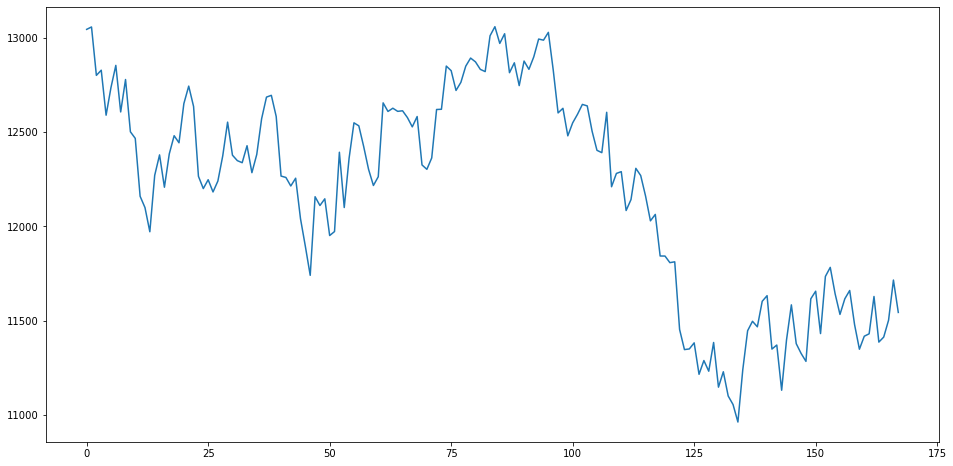

In [142]:
plt.figure(figsize = (16, 8))
plt.plot(dow[:,5])

#### Question 11-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

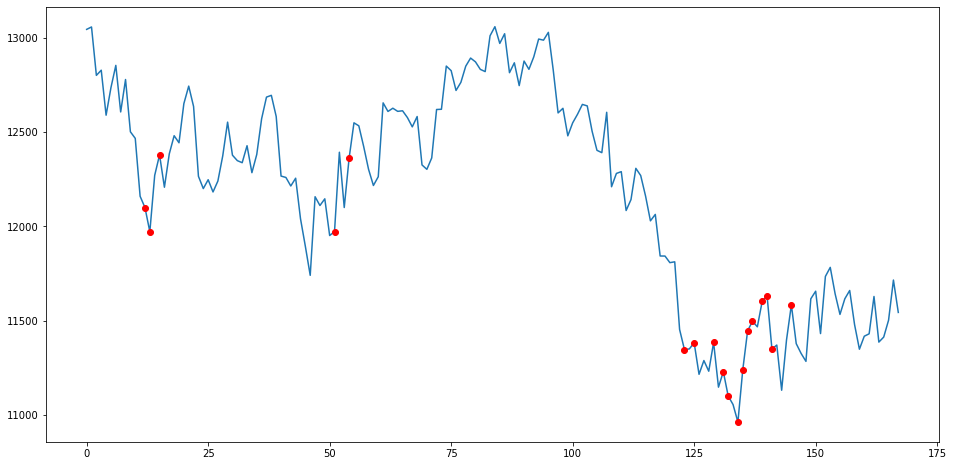

In [144]:
plt.figure(figsize = (16, 8))
plt.plot(dow[:,5])
plt.plot(where(VOLUME_MASK)[0],
               dow[where(VOLUME_MASK)[0], 5],
               "ro")

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>